In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Final Year Research/data/new_smoter_garments_worker_productivity.csv')

In [ ]:
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,finishing,Thursday,1,0.750000,3.940000,0.0,960.0,0.0,0.0,0,0,8,0.886500
1,Quarter1,sewing,Thursday,11,0.800000,11.410000,968.0,3660.0,50.0,0.0,0,0,30,0.800570
2,Quarter1,sewing,Thursday,12,0.800000,11.410000,968.0,3660.0,50.0,0.0,0,0,30,0.800570
3,Quarter1,sewing,Thursday,6,0.800000,25.900000,1170.0,1920.0,50.0,0.0,0,0,56,0.800382
4,Quarter1,sewing,Thursday,7,0.800000,25.900000,984.0,6720.0,38.0,0.0,0,0,56,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,Quarter2,sewing,Thursday,5,0.701996,2.385729,0.0,3323.0,0.0,0.0,0,0,8,0.407855
1754,Quarter2,sewing,Thursday,5,0.804297,4.631741,0.0,3394.0,0.0,0.0,0,0,8,0.341169
1755,Quarter2,sewing,Thursday,5,0.696004,4.269361,2.0,1334.0,0.0,0.0,0,0,7,0.537701
1756,Quarter2,sewing,Thursday,5,0.498059,15.374341,1571.0,694.0,21.0,0.0,0,0,52,0.498546


In [ ]:
data['no_of_style_change'] = data['no_of_style_change'].astype(str)
data['team'] = data['team'].astype(str)
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1758 non-null   object 
 1   department             1758 non-null   object 
 2   day                    1758 non-null   object 
 3   team                   1758 non-null   object 
 4   targeted_productivity  1758 non-null   float64
 5   smv                    1758 non-null   float64
 6   wip                    1758 non-null   float64
 7   over_time              1758 non-null   float64
 8   incentive              1758 non-null   float64
 9   idle_time              1758 non-null   float64
 10  idle_men               1758 non-null   int64  
 11  no_of_style_change     1758 non-null   object 
 12  no_of_workers          1758 non-null   int64  
 13  actual_productivity    1758 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 192.4+ 

In [ ]:
# # zero count in the numerical features
# # data['no_of_style_change'] = data['no_of_style_change'].astype(str)

# numerical = ['targeted_productivity', 'std_minute_value', 'work_in_progress', 'over_time', 'incentive', 'idle_time', 'idle_men',  'no_of_workers', 'actual_productivity']
# zero_count = [len(data[data['targeted_productivity'] == 0]),
#               len(data[data['std_minute_value'] == 0]),
#               len(data[data['work_in_progress'] == 0]),
#               len(data[data['over_time'] == 0]),
#               len(data[data['incentive'] == 0]),
#               len(data[data['idle_time'] == 0]),
#               len(data[data['idle_men'] == 0]),
#               len(data[data['no_of_workers'] == 0]),
#               len(data[data['actual_productivity'] == 0])]

# dict = {"numerical_feature": numerical, "zero_count": zero_count}
# zero_count_dataset = pd.DataFrame(dict)

# zero_count_dataset['zero_percentatge'] = zero_count_dataset['zero_count'] / len(data) * 100
# zero_count_dataset

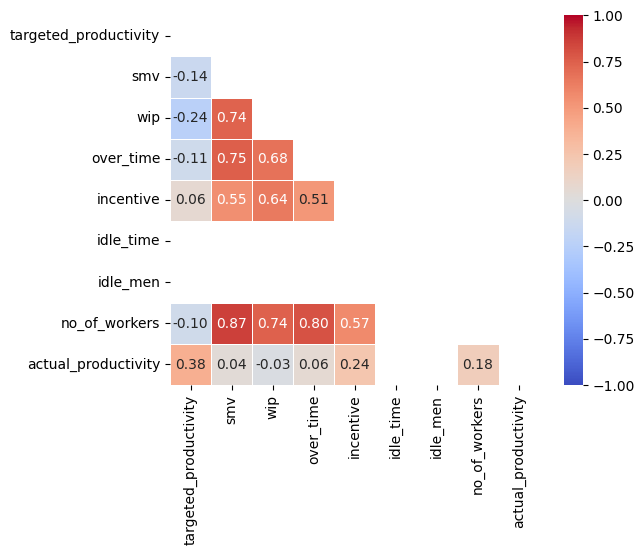

In [ ]:
numerical = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical = [feature for feature in data.columns if data[feature].dtype == 'O']

mask = np.triu(np.ones_like(data[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(data[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

In [ ]:
data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1758 non-null   object 
 1   department             1758 non-null   object 
 2   day                    1758 non-null   object 
 3   team                   1758 non-null   object 
 4   targeted_productivity  1758 non-null   float64
 5   smv                    1758 non-null   float64
 6   wip                    1758 non-null   float64
 7   over_time              1758 non-null   float64
 8   incentive              1758 non-null   float64
 9   idle_time              1758 non-null   float64
 10  idle_men               1758 non-null   int64  
 11  no_of_style_change     1758 non-null   object 
 12  no_of_workers          1758 non-null   int64  
 13  actual_productivity    1758 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 192.4+ 

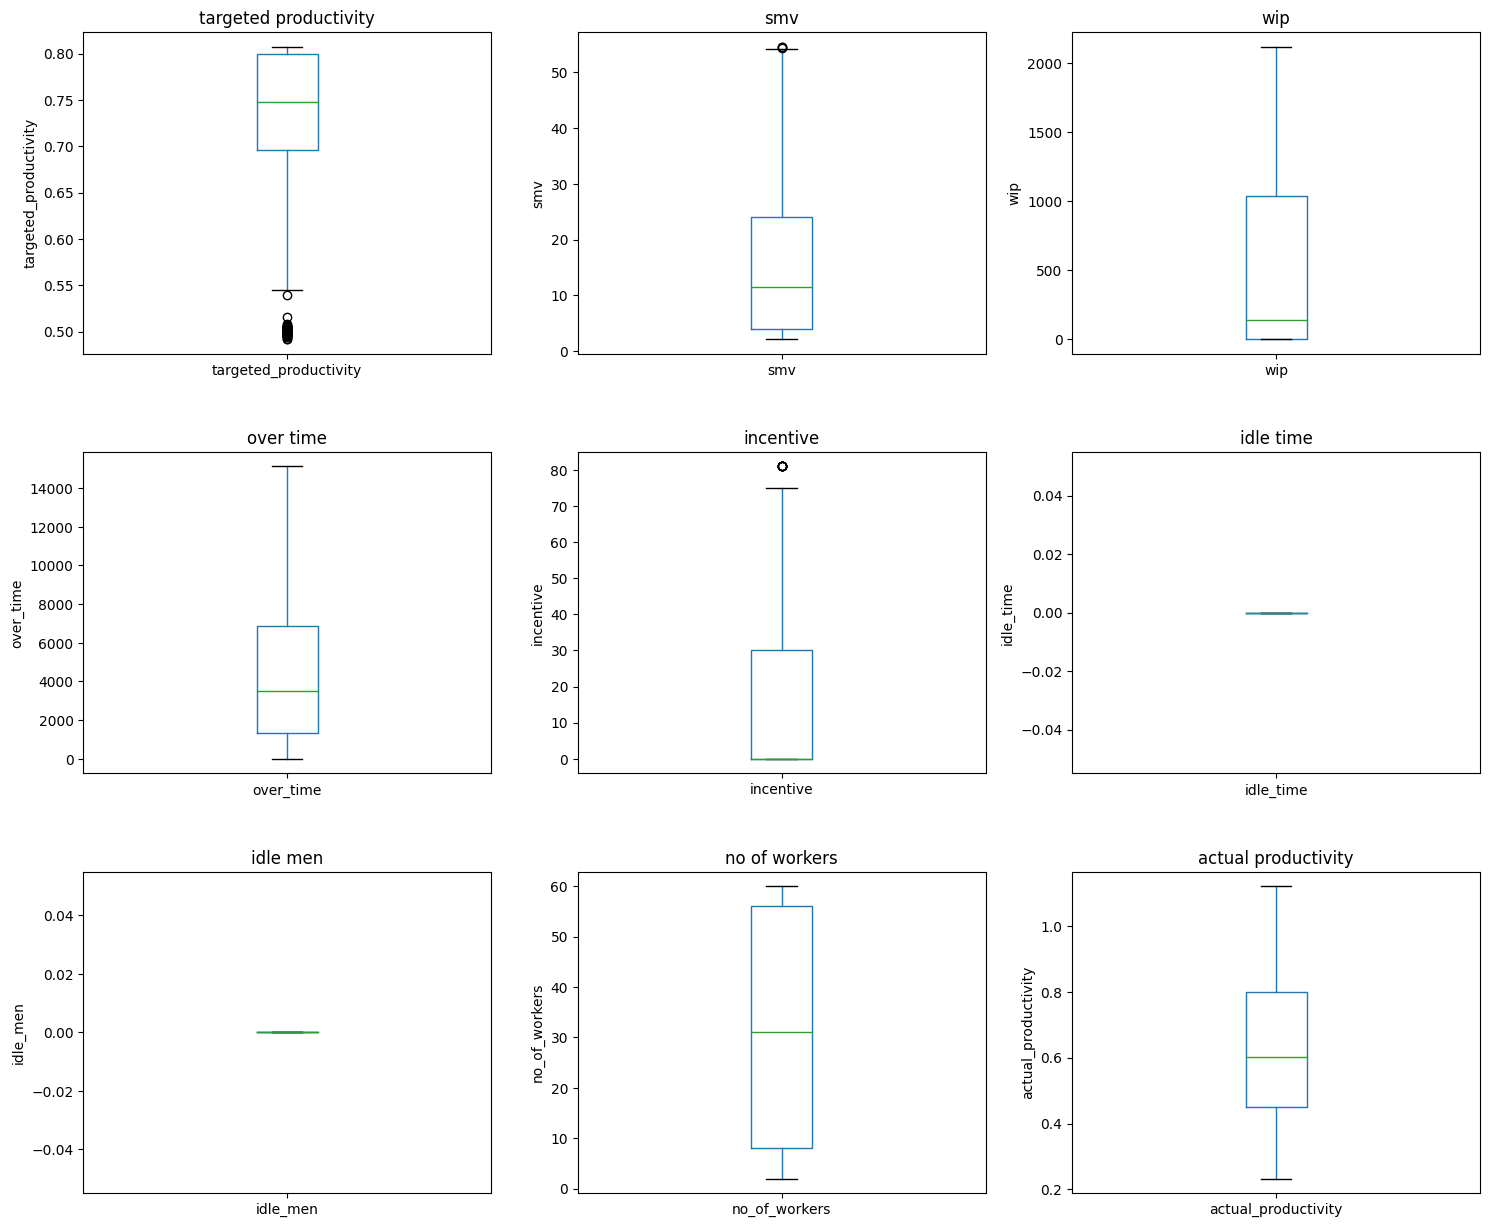

In [ ]:
categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
# prompt: remove outliers from all the variableand reset the index of the dataset
# outliers = ['wip', 'incentive', 'over_time']
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate over numerical columns and remove outliers
new_data = data.copy()
for column in numerical:
    new_data = remove_outliers_iqr(new_data, column)

# Reset index
new_data = new_data.reset_index(drop=True)

# Display the dataset without outliers
new_data


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,finishing,Thursday,1,0.750000,3.940000,0.0,960.0,0.0,0.0,0,0,8,0.886500
1,Quarter1,sewing,Thursday,11,0.800000,11.410000,968.0,3660.0,50.0,0.0,0,0,30,0.800570
2,Quarter1,sewing,Thursday,12,0.800000,11.410000,968.0,3660.0,50.0,0.0,0,0,30,0.800570
3,Quarter1,sewing,Thursday,6,0.800000,25.900000,1170.0,1920.0,50.0,0.0,0,0,56,0.800382
4,Quarter1,sewing,Thursday,7,0.800000,25.900000,984.0,6720.0,38.0,0.0,0,0,56,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Quarter2,sewing,Thursday,5,0.704677,2.841239,0.0,807.0,0.0,0.0,0,0,6,0.395110
1556,Quarter2,sewing,Thursday,5,0.701996,2.385729,0.0,3323.0,0.0,0.0,0,0,8,0.407855
1557,Quarter2,sewing,Thursday,5,0.804297,4.631741,0.0,3394.0,0.0,0.0,0,0,8,0.341169
1558,Quarter2,sewing,Thursday,5,0.696004,4.269361,2.0,1334.0,0.0,0.0,0,0,7,0.537701


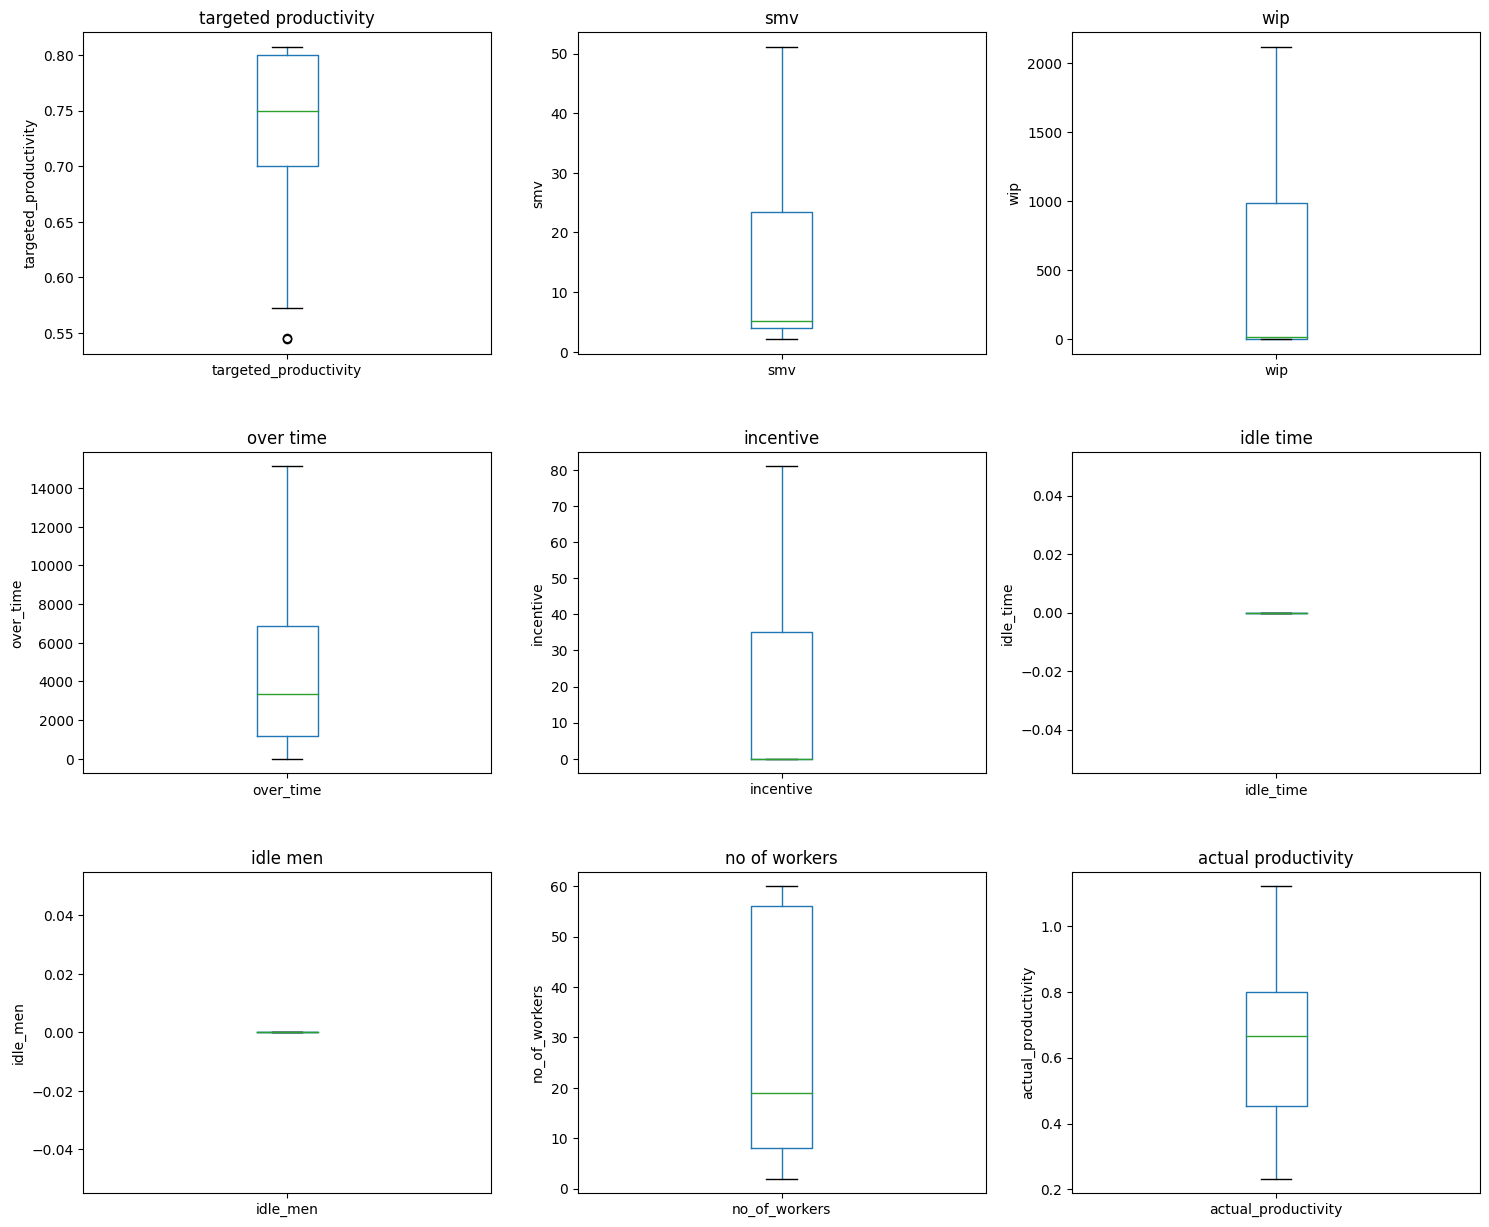

In [ ]:
# categorical = ["quarter", "department", "day", "team"]
# numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  new_data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

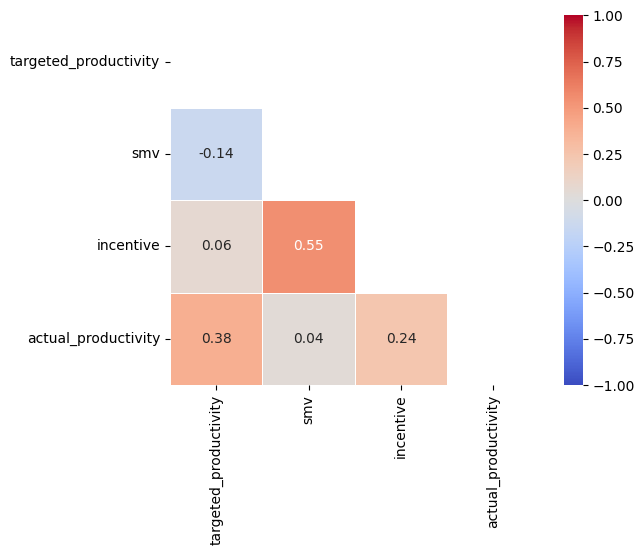

In [ ]:
numerical_cols_1 = ['targeted_productivity', 'smv', 'incentive', 'actual_productivity']

mask = np.triu(np.ones_like(data[numerical_cols_1].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(data[numerical_cols_1].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1560 non-null   object 
 1   department             1560 non-null   object 
 2   day                    1560 non-null   object 
 3   team                   1560 non-null   object 
 4   targeted_productivity  1560 non-null   float64
 5   smv                    1560 non-null   float64
 6   wip                    1560 non-null   float64
 7   over_time              1560 non-null   float64
 8   incentive              1560 non-null   float64
 9   idle_time              1560 non-null   float64
 10  idle_men               1560 non-null   int64  
 11  no_of_style_change     1560 non-null   object 
 12  no_of_workers          1560 non-null   int64  
 13  actual_productivity    1560 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 170.8+ 

## Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
torch.manual_seed(42)

In [ ]:
new_data[categorical]

,quarter,department,day,team,no_of_style_change
0,Quarter1,finishing,Thursday,1,0
1,Quarter1,sewing,Thursday,11,0
2,Quarter1,sewing,Thursday,12,0
3,Quarter1,sewing,Thursday,6,0
4,Quarter1,sewing,Thursday,7,0
...,...,...,...,...,...
1555,Quarter2,sewing,Thursday,5,0
1556,Quarter2,sewing,Thursday,5,0
1557,Quarter2,sewing,Thursday,5,0
1558,Quarter2,sewing,Thursday,5,0


In [ ]:
# categorical_cols = ['quarter', 'department', 'day', 'team', 'no_of_style_change']
# numerical_cols = ['targeted_productivity', 'smv', 'wip' ,'over_time' ,'incentive', 'idle_time', 'idle_men', 'no_of_workers']

categorical_cols = ['quarter', 'department', 'day', 'team', 'no_of_style_change']
# numerical_cols = ['targeted_productivity', 'smv', 'wip' ,'over_time', 'incentive', 'no_of_workers']
numerical_cols = ['targeted_productivity', 'smv', 'incentive']

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
categorical_data = encoder.fit_transform(new_data[categorical_cols])

# Scale numerical columns
scaler = MinMaxScaler()
numerical_data = scaler.fit_transform(new_data[numerical_cols])

# Combine encoded categorical and scaled numerical data
X = np.concatenate([categorical_data, numerical_data], axis=1)
y = new_data['actual_productivity']

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
temp = np.concatenate([categorical_data, numerical_data], axis=1)
temp[1]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.97161114, 0.18901886,
       0.61728395])

In [ ]:
new_data['actual_productivity'].values.reshape(-1, 1).shape

(1560, 1)

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
class GarmentProductivityModel(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        # x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        # x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Hyperparameters
input_size = X_train.shape[1]   # 40
hidden_size_1 = 64
hidden_size_2 = 32
output_size = 1
learning_rate = 0.001
num_epochs = 20

# Create model instance
model = GarmentProductivityModel(input_size, hidden_size_1, hidden_size_2, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)


In [ ]:
train_losses = []
val_losses = []
test_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)

        # Reshape labels to match the output shape
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    # Print or log the average training and validation loss for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

#Test
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print(f"Test Loss: {test_loss:.4f}")


Epoch [1/20], Train Loss: 0.1216, Val Loss: 0.0511
Epoch [2/20], Train Loss: 0.0237, Val Loss: 0.0659
Epoch [3/20], Train Loss: 0.0187, Val Loss: 0.0657
Epoch [4/20], Train Loss: 0.0176, Val Loss: 0.0676
Epoch [5/20], Train Loss: 0.0170, Val Loss: 0.0672
Epoch [6/20], Train Loss: 0.0164, Val Loss: 0.0672
Epoch [7/20], Train Loss: 0.0162, Val Loss: 0.0698
Epoch [8/20], Train Loss: 0.0159, Val Loss: 0.0683
Epoch [9/20], Train Loss: 0.0155, Val Loss: 0.0684
Epoch [10/20], Train Loss: 0.0152, Val Loss: 0.0681
Epoch [11/20], Train Loss: 0.0149, Val Loss: 0.0687
Epoch [12/20], Train Loss: 0.0147, Val Loss: 0.0671
Epoch [13/20], Train Loss: 0.0144, Val Loss: 0.0704
Epoch [14/20], Train Loss: 0.0145, Val Loss: 0.0680
Epoch [15/20], Train Loss: 0.0141, Val Loss: 0.0703
Epoch [16/20], Train Loss: 0.0140, Val Loss: 0.0706
Epoch [17/20], Train Loss: 0.0141, Val Loss: 0.0708
Epoch [18/20], Train Loss: 0.0139, Val Loss: 0.0663
Epoch [19/20], Train Loss: 0.0136, Val Loss: 0.0704
Epoch [20/20], Train 

In [ ]:
with torch.no_grad():
    test_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, labels).item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print(f"Test Loss: {test_loss:.4f}")


Test Loss: 0.0610


In [ ]:
# Make predictions on the training set
y_pred = model(X_train_tensor).squeeze(1)

# Calculate RMSE and MAE
def rmse(y_true, y_pred):
  return torch.sqrt(torch.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
  return torch.mean(torch.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
  mean_y_true = torch.mean(y_true)
  ss_tot = torch.sum((y_true - mean_y_true) ** 2)
  ss_res = torch.sum((y_true - y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2.item()

rmse_train = rmse(y_train_tensor, y_pred)
mae_train = mae(y_train_tensor, y_pred)
r2_train = r2_score(y_train_tensor, y_pred)

print("RMSE:", rmse_train.item())
print("MAE:", mae_train.item())
print("R-squared:", r2_train)

RMSE: 0.114019013941288
MAE: 0.0826556384563446
R-squared: 0.6993651390075684


In [ ]:
# Make predictions on the validation set
y_pred = model(X_val_tensor).squeeze(1)

# Calculate RMSE and MAE
def rmse(y_true, y_pred):
  return torch.sqrt(torch.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
  return torch.mean(torch.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
  mean_y_true = torch.mean(y_true)
  ss_tot = torch.sum((y_true - mean_y_true) ** 2)
  ss_res = torch.sum((y_true - y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2.item()

rmse_val = rmse(y_val_tensor, y_pred)
mae_val = mae(y_val_tensor, y_pred)
r2_val = r2_score(y_val_tensor, y_pred)

print("RMSE:", rmse_val.item())
print("MAE:", mae_val.item())
print("R-squared:", r2_val)

RMSE: 0.11585967242717743
MAE: 0.08867470920085907
R-squared: 0.6922340393066406


In [ ]:
# Make predictions on the test set
y_pred = model(X_test_tensor).squeeze(1)

# Calculate RMSE and MAE
def rmse(y_true, y_pred):
  return torch.sqrt(torch.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
  return torch.mean(torch.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
  mean_y_true = torch.mean(y_true)
  ss_tot = torch.sum((y_true - mean_y_true) ** 2)
  ss_res = torch.sum((y_true - y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2.item()

rmse_test = rmse(y_test_tensor, y_pred)
mae_test = mae(y_test_tensor, y_pred)
r2_test = r2_score(y_test_tensor, y_pred)

print("RMSE:", rmse_test.item())
print("MAE:", mae_test.item())
print("R-squared:", r2_test)

RMSE: 0.1314665824174881
MAE: 0.09322850406169891
R-squared: 0.5519773364067078


In [ ]:
y_test_tensor.shape

torch.Size([156])

In [ ]:
y_pred

tensor([0.8383, 0.7813, 0.6323, 0.7319, 0.6962, 0.4361, 0.7211, 0.7398, 0.7023,
        0.6373, 0.5907, 0.5614, 0.5087, 0.8169, 0.4146, 0.8842, 0.4905, 0.7071,
        0.8895, 0.4145, 0.6852, 0.5985, 0.6067, 0.8845, 0.8053, 0.4150, 0.4144,
        0.7630, 0.4037, 0.6911, 0.5535, 0.6566, 0.6304, 0.7913, 0.6266, 0.7889,
        0.4193, 0.4206, 0.7153, 0.7110, 0.7530, 0.5036, 0.5900, 0.4127, 0.4112,
        0.4181, 0.6001, 0.6402, 0.6943, 0.4232, 0.7750, 0.4143, 0.4149, 0.7787,
        0.4146, 0.6732, 0.4188, 0.4081, 0.5901, 0.7055, 0.6609, 0.6823, 0.8630,
        0.6200, 0.6411, 0.4145, 0.6698, 0.8535, 0.8067, 0.4224, 0.7768, 0.8541,
        0.6969, 0.4832, 0.8462, 0.8305, 0.8476, 0.4232, 0.4148, 0.5516, 0.6216,
        0.7358, 0.6807, 0.6558, 0.7820, 0.7895, 0.7962, 0.8352, 0.7705, 0.4398,
        0.7367, 0.4113, 0.8169, 0.8897, 0.5957, 0.7786, 0.8190, 0.7609, 0.8744,
        0.7859, 0.4032, 0.4112, 0.4119, 0.4021, 0.4939, 0.4164, 0.6638, 0.8392,
        0.8301, 0.9046, 0.7147, 0.4146, 

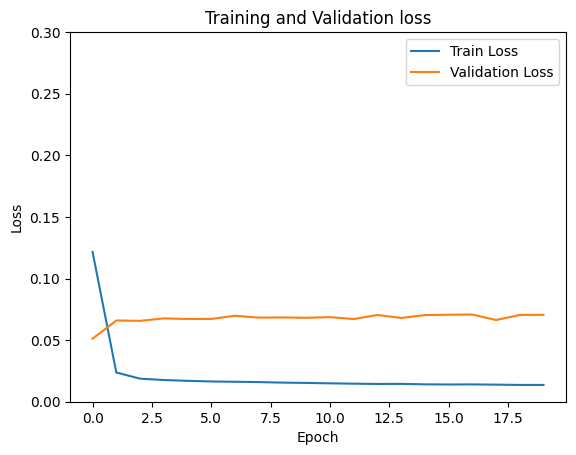

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
# plt.plot(test_loss, label='Test Loss')  # Plot test loss as a point
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 0.3)
plt.title('Training and Validation loss')
plt.legend()
plt.show()

### Save the Model

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Final Year Research/garment_nn_model_1.pt')

### Load the model

In [ ]:
# Load the Saved Model
load_model = GarmentProductivityModel(input_size, hidden_size_1, hidden_size_2, output_size)
load_model.load_state_dict(torch.load('/content/drive/MyDrive/Final Year Research/garment_nn_model_1.pt'))

<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
load_model.eval()

GarmentProductivityModel(
  (fc1): Linear(in_features=31, out_features=64, bias=True)
  (relu): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
# Quarter1, sewing, Thursday, 0.80, 26.16, 1108.0, 7080.0, 98.000000, 0.0, 0, 0, 59        # 0.940725

In [ ]:
test_data = torch.tensor(X[0], dtype=torch.float32)

In [ ]:
with torch.no_grad():
    predicted_productivity = load_model(test_data)

print("Predicted productivity:", predicted_productivity.item())

Predicted productivity: 0.8095924258232117


In [ ]:
y_test_prediction = []

for i in range(0, len(y_pred)):
    y_test_prediction.append(y_pred[i].item())

In [ ]:
y_test_prediction

[0.8382609486579895,
 0.781276524066925,
 0.6323078870773315,
 0.7319294810295105,
 0.6961696147918701,
 0.43605807423591614,
 0.7210893034934998,
 0.739821195602417,
 0.7023312449455261,
 0.6372707486152649,
 0.5907298922538757,
 0.5613844394683838,
 0.5087060332298279,
 0.8169430494308472,
 0.4146367311477661,
 0.8842443227767944,
 0.49048560857772827,
 0.7071258425712585,
 0.8894686102867126,
 0.41448646783828735,
 0.6851828098297119,
 0.598531186580658,
 0.60671067237854,
 0.8845075368881226,
 0.8052945733070374,
 0.4150368571281433,
 0.4144168496131897,
 0.7629912495613098,
 0.4036843478679657,
 0.6910622715950012,
 0.5534874796867371,
 0.6565693616867065,
 0.630439281463623,
 0.7913361191749573,
 0.6266118884086609,
 0.7888598442077637,
 0.41932469606399536,
 0.4205843508243561,
 0.7153393626213074,
 0.7109770774841309,
 0.7530301213264465,
 0.5036129951477051,
 0.58998703956604,
 0.4127372205257416,
 0.41116058826446533,
 0.41814759373664856,
 0.6000757217407227,
 0.640220940113

In [ ]:
item_index = [i for i in np.arange(0, 120)]

In [ ]:
len(item_index)

120

In [ ]:
test_prediction = pd.DataFrame(list(zip(item_index, list(y_test), y_test_prediction)), columns=['item_index', 'y_test', 'y_prediction'])
test_prediction

,item_index,y_test,y_prediction
0,0,0.890604,0.838261
1,1,0.800402,0.781277
2,2,0.557252,0.632308
3,3,0.700542,0.731929
4,4,0.700437,0.696170
...,...,...,...
115,115,0.480958,0.428764
116,116,0.492975,0.423396
117,117,0.912037,0.803484
118,118,0.558687,0.410916


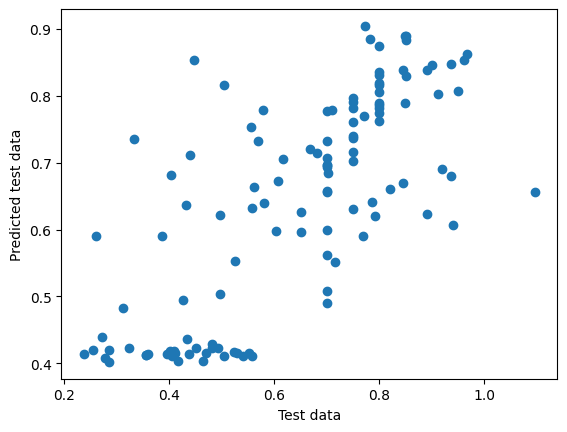

In [ ]:
plt.scatter(test_prediction['y_test'], test_prediction['y_prediction'])
plt.xlabel('Test data')
plt.ylabel('Predicted test data')
plt.show()

In [ ]:
## identify some relationships

data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960.0,0.0,0.0,0,0,8,0.886500
1,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30,0.800570
2,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30,0.800570
3,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920.0,50.0,0.0,0,0,56,0.800382
4,Quarter1,sewing,Thursday,7,0.80,25.90,984.0,6720.0,38.0,0.0,0,0,56,0.800125


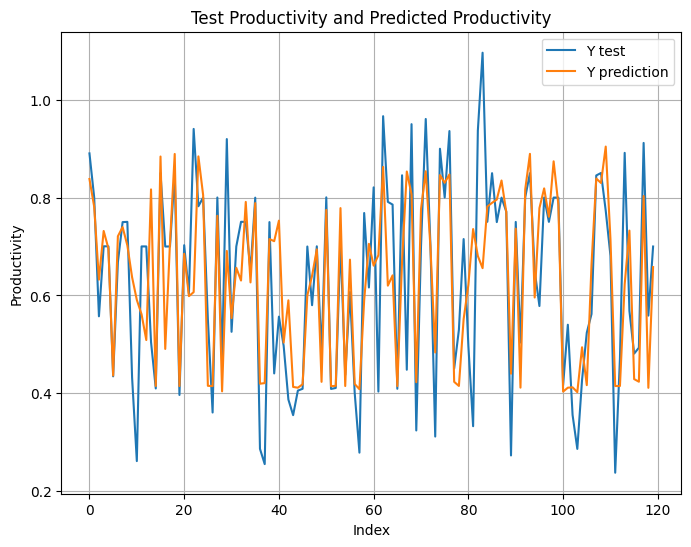

In [ ]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(test_prediction.item_index, test_prediction.y_test, label='Y test')
plt.plot(test_prediction.item_index, test_prediction.y_prediction, label='Y prediction')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Productivity')
plt.title('Test Productivity and Predicted Productivity')
# plt.xticks(np.arange(min(test_prediction.item_index), max(test_prediction.item_index) + 1, 10))
plt.legend()

plt.grid(True)
plt.show()